In [1]:
# 使用 seaborn 绘制矩阵图 (pairplot)
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
#https://tensorflow.google.cn/tutorials/keras/regression?hl=zh_cn

2.3.1


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 11us/step


'/Users/gangzhai/.keras/datasets/auto-mpg.data'

In [12]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [13]:
#数据集中包括一些未知值
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [14]:
#删除空行
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [15]:
origin = dataset.pop('Origin')
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
5,15.0,8,429.0,198.0,4341.0,10.0,70
6,14.0,8,454.0,220.0,4354.0,9.0,70
7,14.0,8,440.0,215.0,4312.0,8.5,70
8,14.0,8,455.0,225.0,4425.0,10.0,70
9,15.0,8,390.0,190.0,3850.0,8.5,70


In [21]:
# print((origin == 1))
# print(type((origin == 1)))
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [23]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset
test_dataset 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0
39,14.0,8,400.0,175.0,4464.0,11.5,71,1.0,0.0,0.0
40,14.0,8,351.0,153.0,4154.0,13.5,71,1.0,0.0,0.0
43,13.0,8,400.0,170.0,4746.0,12.0,71,1.0,0.0,0.0
48,18.0,6,250.0,88.0,3139.0,14.5,71,1.0,0.0,0.0
54,35.0,4,72.0,69.0,1613.0,18.0,71,0.0,0.0,1.0


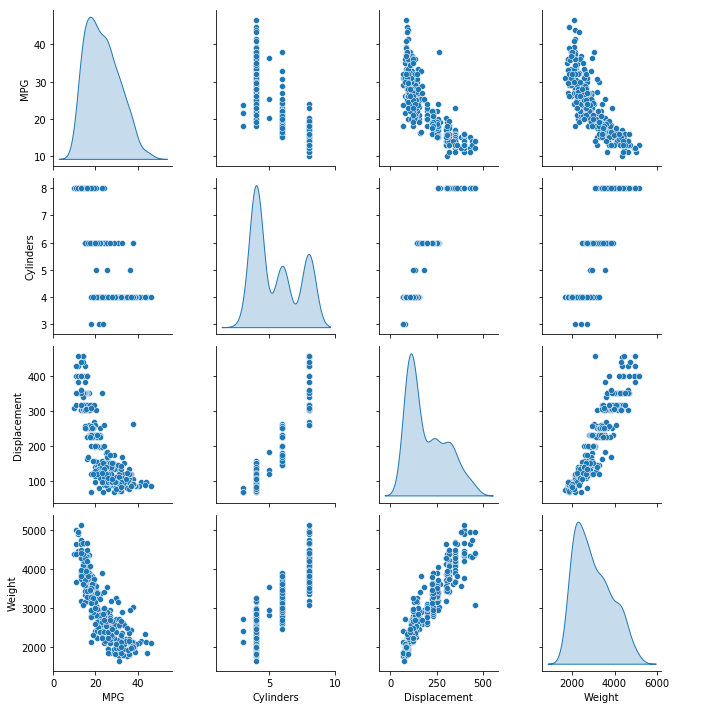

In [24]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [25]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [26]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [27]:
# 归一化输入向量
# 归一化输入向量在机器学习问题中是一个通用的方法。在一些应用中，由于使用距离或者特征方差，要求必须归一化输入向量，
# 因为如果不归一化将导致结果会严重被具有大方差的特征和不同的尺度影响。归一化输入能够帮助数值最优方法（例如，梯度下降法）更快，更准确地收敛。
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

`学习率的调整`

为了能够使得梯度下降法有较好的性能，我们需要把学习率的值设定在合适的范围内。学习率决定了参数移动到最优值的速度快慢。如果学习率过大，很可能会越过最优值；反而如果学习率过小，优化的效率可能过低，长时间算法无法收敛。所以学习率对于算法性能的表现至关重要。


```对于不同大小的数据集，调节不同的学习率```

根据我们选择的成本函数F()不同，问题会有区别。当平方误差和（Sum of Squared Errors）作为成本函数时， ∂F(ωj) / ∂ωj 会随着训练集数据的增多变得越来越大，因此学习率需要被设定在相应更小的值上。

解决此类问题的一个方法是将学习率λ 乘上1/N，N是训练集中数据量。这样每部更新的公式变成下面的形式：

ωj = ωj - (λ/N) * ∂F(ωj) / ∂ωj

相关内容可参考： Wilson et al. paper “The general inefﬁciency of batch training for gradient descent learning”

另外一种解决方法是：选择一个不被训练集样本个数影响的成本函数，如均值平方差（Mean Squared Errors）。

 

```在每次迭代中调节不同的学习率```

在每次迭代中去调整学习率的值是另一种很好的学习率自适应方法。此类方法的基本思路是当你离最优值越远，你需要朝最优值移动的就越多，即学习率就应该越大；反之亦反。

但是这里有一个问题，就是我们并不知道实际上的最优值在哪里，我们也不知道每一步迭代中我们离最优值有多远。


解决办法是，我们在每次迭代的最后，使用估计的模型参数检查误差函数（error function）的值。如果相对于上一次迭代，错误率减少了，就可以增大学习率，以5%的幅度；如果相对于上一次迭代，错误率增大了（意味着跳过了最优值），那么应该重新设置上一轮迭代ωj 的值，并且减少学习率到之前的50%。这种方法叫做 Bold Driver.

In [28]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])




  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

  return model

# Metric functions are similar to loss functions, except that the results from evaluating a metric are not 
#used when training the model. Note that you may use any loss function as a metric.
#mean_squared_erro=mse
#mean_absolute_error=mae
keras支持的Optimizers
SGD
随机梯度下降优化器。包含扩展功能的支持： - 动量（momentum）优化, - 学习率衰减（每次参数更新后） - Nestrov动量(NAG)优化
RMSprop
RMSProp优化器。建议使用优化器的默认参数 （除了学习率lr，它可以被自由调节）。这个优化器通常是训练循环神经网络RNN的不错选择。
Adagrad
Adagrad优化器。Adagrad是一种具有特定参数学习率的优化器，它根据参数在训练期间的更新频率进行自适应调整。 参数接收的更新越多，更新越小。建议使用优化器的默认参数。
Adadelta
Adadelta优化器。Adadelta是Adagrad的一个具有更强鲁棒性的的扩展版本，它不是累积所有过去的梯度，而是根据渐变更新的移动窗口调整学习速率。 这样，即使进行了许多更新，Adadelta仍在继续习。与Adagrad相比，在Adadelta的原始版本中，您无需设置初始学习率。 在此版本中，与大多数其他Keras优化器一样，可以设置初始学习速率和衰减因子。建议使用优化器的默认参数。
Adam(cs231n推荐用这个)
Adam优化器。默认参数遵循原论文中提供的值。
Adamax
Adamax优化器，来自Adam论文的第七小节。它是Adam算法基于无穷范数（infinity norm）的变种。 默认参数遵循论文中提供的值。
Nadam
Nesterov版本Adam优化器。正像Adam本质上是RMSProp与动量momentum的结合， Nadam是采用Nesterov momentum版本的Adam优化器。默认参数遵循论文中提供的值。 建议使用优化器的默认参数。
# 如何选择优化器 optimizer（含动量参数的解释）
[如何选择优化器]（https://www.jianshu.com/p/d99b83f4c1a6/）


In [29]:
model = build_model()

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [31]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.40075064],
       [-0.21089888],
       [-0.15534207],
       [ 0.07581582],
       [ 0.02655565],
       [-0.12985   ],
       [ 0.0541851 ],
       [-0.20930202],
       [-0.04827804],
       [-0.33958036]], dtype=float32)

In [32]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])
#validation_split验证集比例


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

# 直观的理解： 
Batch Size定义：一次训练所选取的样本数。 
Batch Size的大小影响模型的优化程度和速度。同时其直接影响到GPU内存的使用情况，假如你GPU内存不大，该数值最好设置小一点。

为什么要提出Batch Size？ 
在没有使用Batch Size之前，这意味着网络在训练时，是一次把所有的数据（整个数据库）输入网络中，然后计算它们的梯度进行反向传播，由于在计算梯度时使用了整个数据库，所以计算得到的梯度方向更为准确。但在这情况下，计算得到不同梯度值差别巨大，难以使用一个全局的学习率，所以这时一般使用Rprop这种基于梯度符号的训练算法，单独进行梯度更新。 
在小样本数的数据库中，不使用Batch Size是可行的，而且效果也很好。但是一旦是大型的数据库，一次性把所有数据输进网络，肯定会引起内存的爆炸。所以就提出Batch Size的概念。

Batch Size设置合适时的优点： 
1、通过并行化提高内存的利用率。就是尽量让你的GPU满载运行，提高训练速度。 
2、单个epoch的迭代次数减少了，参数的调整也慢了，假如要达到相同的识别精度，需要更多的epoch。 
3、适当Batch Size使得梯度下降方向更加准确。

Batch Size从小到大的变化对网络影响 
1、没有Batch Size，梯度准确，只适用于小样本数据库 
2、Batch Size=1，梯度变来变去，非常不准确，网络很难收敛。 
3、Batch Size增大，梯度变准确， 
4、Batch Size增大，梯度已经非常准确，再增加Batch Size也没有用

注意：Batch Size增大了，要到达相同的准确度，必须要增大epoch。

GD（Gradient Descent）：就是没有利用Batch Size，用基于整个数据库得到梯度，梯度准确，但数据量大时，计算非常耗时，同时神经网络常是非凸的，网络最终可能收敛到初始点附近的局部最优点。

SGD（Stochastic Gradient Descent）：就是Batch Size=1，每次计算一个样本，梯度不准确，所以学习率要降低。

mini-batch SGD：就是选着合适Batch Size的SGD算法，mini-batch利用噪声梯度，一定程度上缓解了GD算法直接掉进初始点附近的局部最优值。同时梯度准确了，学习率要加大。 
对于mini-batch SGD:

loss值:    L=1m∑i=1mL(xi,yi)
gradient值:    g=1m∑i=1mg(xi,yi)
为什么说Batch size的增大能使网络的梯度更准确？ 
梯度的方差表示： 
Var(g)=Var(1m∑mi=1g(xi,yi))=1m2Var(g(x1,y1)+g(x2,y2)+⋅⋅⋅+g(xm,ym))
 
由于样本是随机选取的，满足独立同分布，所以所有样本具有相同的方差Var(g(xi,yi))
 
所以上式可以简化成Var(g)=1mVar(g(xi,yi))
 
可以看出当Batch size为m时，样本的方差减少m倍，梯度就更准确了。

假如想要保持原来数据的梯度方差，可以增大学习率lr
 
1mVar(lr∗g(xi,yi))
,只要lr
取m−−√
，上式就变成Var(g(xi,yi))
 
这也说明batch size设置较大时，一般学习率要增大。但是lr
的增大不是一开始就设置的很大，而是在训练过程中慢慢变大。

一个具体例子分析： 
在分布式训练中，Batch size随着数据并行的workers增加而增大，假如baseline的Batch Size为B
，而学习率为lr
，训练epoch为N
。假如保持baseline的lr
，一般达不到很好的收敛速度和精度。 
原因：对于收敛速度，假如有K
个workers，则每个批次为KB
，因此一个epoch迭代的次数为baseline的1k
，而学习率lr
不变，所以要达到与baseline相同的收敛情况，epoch要增大。而根据上面公式，epoch最大需要增大KN
个epoch，但一般情况下不需要增大那么多。 
对于收敛精度，由于Batch size的使用使梯度更准确，噪声减少，所以更容易收敛

In [33]:
#使用 history 对象中存储的统计信息可视化模型的训练进度。
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
loss	mae	mse	val_loss	val_mae	val_mse	epoch

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.276734,0.952688,2.276734,8.972248,2.207325,8.972248,995
996,2.386412,0.930789,2.386412,9.300345,2.272096,9.300345,996
997,2.409626,0.982627,2.409626,8.844366,2.195255,8.844366,997
998,2.246634,0.960784,2.246634,8.824938,2.185297,8.824938,998
999,2.464688,0.948262,2.464688,8.974367,2.224000,8.974367,999


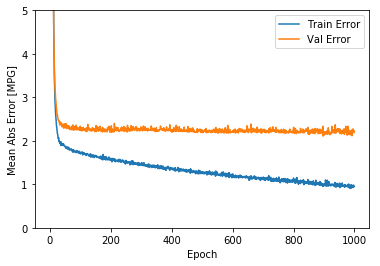

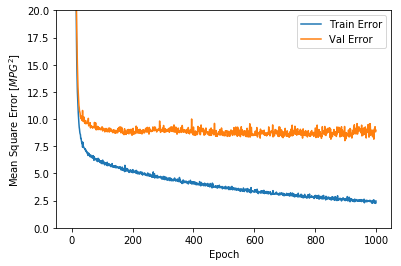

In [34]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


...................................................................................................

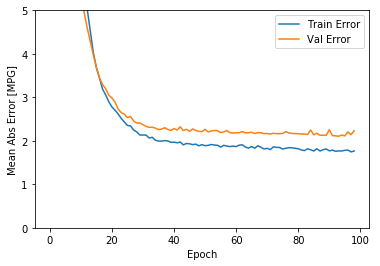

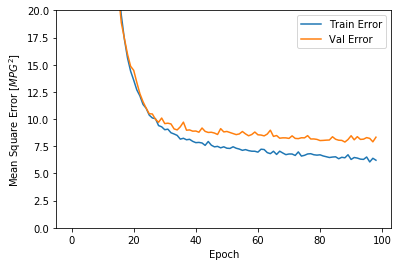

In [35]:
# 该图表显示在约100个 epochs 之后误差非但没有改进，反而出现恶化。 让我们更新 model.fit 调用，当验证值没有提高上是自动停止训练。 我们将使用一个 EarlyStopping callback 来测试每个 epoch 的训练条件。如果经过一定数量的 epochs 后没有改进，则自动停止训练。

# 你可以从这里学习到更多的回调。
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [36]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.3666 - mae: 1.7150 - mse: 5.3666
Testing set Mean Abs Error:  1.72 MPG


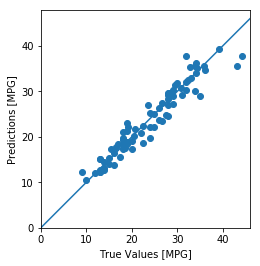

In [37]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


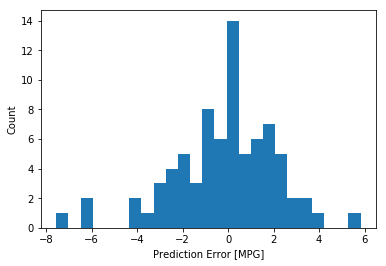

In [38]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")